<a href="https://colab.research.google.com/github/satuelisa/NLPF/blob/main/NLPF_07_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import nltk
nltk.download('punkt') # once per computer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
stemmers = [ nltk.PorterStemmer(), nltk.LancasterStemmer() ]
sample = "Hey, my dudes, how's it hanging this fine day?"
tokens = nltk.word_tokenize(sample)
for token in tokens: 
  print(token, [ stemmer.stem(token) for stemmer in stemmers ])

Hey ['hey', 'hey']
, [',', ',']
my ['my', 'my']
dudes ['dude', 'dud']
, [',', ',']
how ['how', 'how']
's ["'s", "'s"]
it ['it', 'it']
hanging ['hang', 'hang']
this ['thi', 'thi']
fine ['fine', 'fin']
day ['day', 'day']
? ['?', '?']


*Dud* and *dude* are not quite the same, neither are *fine* and *fin*, so the first stemmer is a bit more reasonable for this particular sample text. Let's get more text, returning to the topic of Amazon product reviews.

In [12]:
nltk.download('product_reviews_2') # once per computer
from nltk.corpus import product_reviews_2 as pr
print(pr.fileids())
corpus = pr.sents() 
print(len(corpus))
print(corpus[0]) # each element is a tokenized list of a sentence

[nltk_data] Downloading package product_reviews_2 to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package product_reviews_2 is already up-to-date!


['Canon_PowerShot_SD500.txt', 'Canon_S100.txt', 'Diaper_Champ.txt', 'Hitachi_router.txt', 'Linksys_Router.txt', 'MicroMP3.txt', 'Nokia_6600.txt', 'README.txt', 'ipod.txt', 'norton.txt']
3729
['We', 'really', 'enjoyed', 'shooting', 'with', 'the', 'Canon', 'PowerShot', 'SD500', '.']


Let's make word clouds: without and with stemming (one per stemmer of the two that we are toying with).

In all cases, we do some of our customary pre-processing.
1. We *do* need to get rid of stop words regardless, otherwise they will be the top-frequency words.
2. We only care about words that contain *no symbols or digits*.
3. We force everything to **lower case** (this is already a form of *normalizing* text; for more on normalization, check Chapter 2 of SLP) 

In [14]:
nltk.download('stopwords') # once per computer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
skip = set(stopwords.words('english'))
inputs = dict()
for sentence in corpus:
    words += [ w for w in sentence if not w.lower() in skip and w.isalpha() ]
print(len(words))
print(words[:20])
for stemmer in stemmers:
  inputs[type(stemmer).__name__] = [ stemmer.stem(w) for w in words ]
inputs['No stemming'] = words # the "raw" option

180204
['really', 'enjoyed', 'shooting', 'Canon', 'PowerShot', 'exterior', 'design', 'combines', 'form', 'function', 'elegantly', 'point', 'shoot', 'ever', 'tested', 'Digic', 'II', 'powered', 'image', 'processing']


What have we created?

In [38]:
for key in inputs:
  print(key, inputs[key][:15])

PorterStemmer ['realli', 'enjoy', 'shoot', 'canon', 'powershot', 'exterior', 'design', 'combin', 'form', 'function', 'elegantli', 'point', 'shoot', 'ever', 'test']
LancasterStemmer ['real', 'enjoy', 'shoot', 'canon', 'powershot', 'extery', 'design', 'combin', 'form', 'funct', 'eleg', 'point', 'shoot', 'ev', 'test']
No stemming ['really', 'enjoyed', 'shooting', 'Canon', 'PowerShot', 'exterior', 'design', 'combines', 'form', 'function', 'elegantly', 'point', 'shoot', 'ever', 'tested']


OK, let's visualize it.

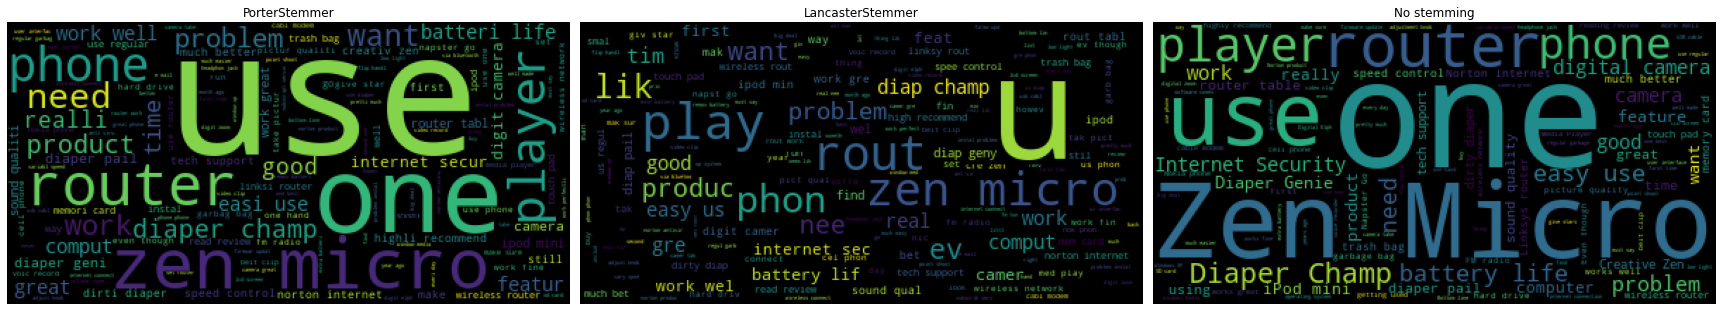

In [39]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [ 24, 12 ]
f, a = plt.subplots(1, 3)
i = 0
for key in inputs:
  a[i].imshow(WordCloud(relative_scaling = 1).generate(' '.join(inputs[key])))
  a[i].axis('off')
  a[i].set_title(key)
  i += 1
plt.tight_layout(pad = 1)
plt.show()

It is easy to see that the word frequency (reflected by the size of the word in the word cloud) differs between stemmers and when there is no stemming, since words like *work* and *working* get stemmed to one same token, same as *phone* and *phones*. Stemming can also result in frequent "not-really-a-word" tokens like *u* or *gre* the meaning of which is harder to understand.

To learn how to stem in R, check out Chapter 4 of SMLTAR. For the weekly reflection tasks, the use of either tool is fine, as always.

So, to keep the words more "legible" for humans, we can resort to *lemmatization* which is like "filtered stemming": affixes are only stripped if the result of such stripping remains within the target vocabulary. Anything that is not a "dictionary word" gets either wholly discarded or remains unaffected.

Let's add a fourth word cloud, now lemmatizing instead of stemming. We will use WordNet as our dictionary.

In [44]:
nltk.download('wordnet') # once per machine
nltk.download('omw-1.4') # same here

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

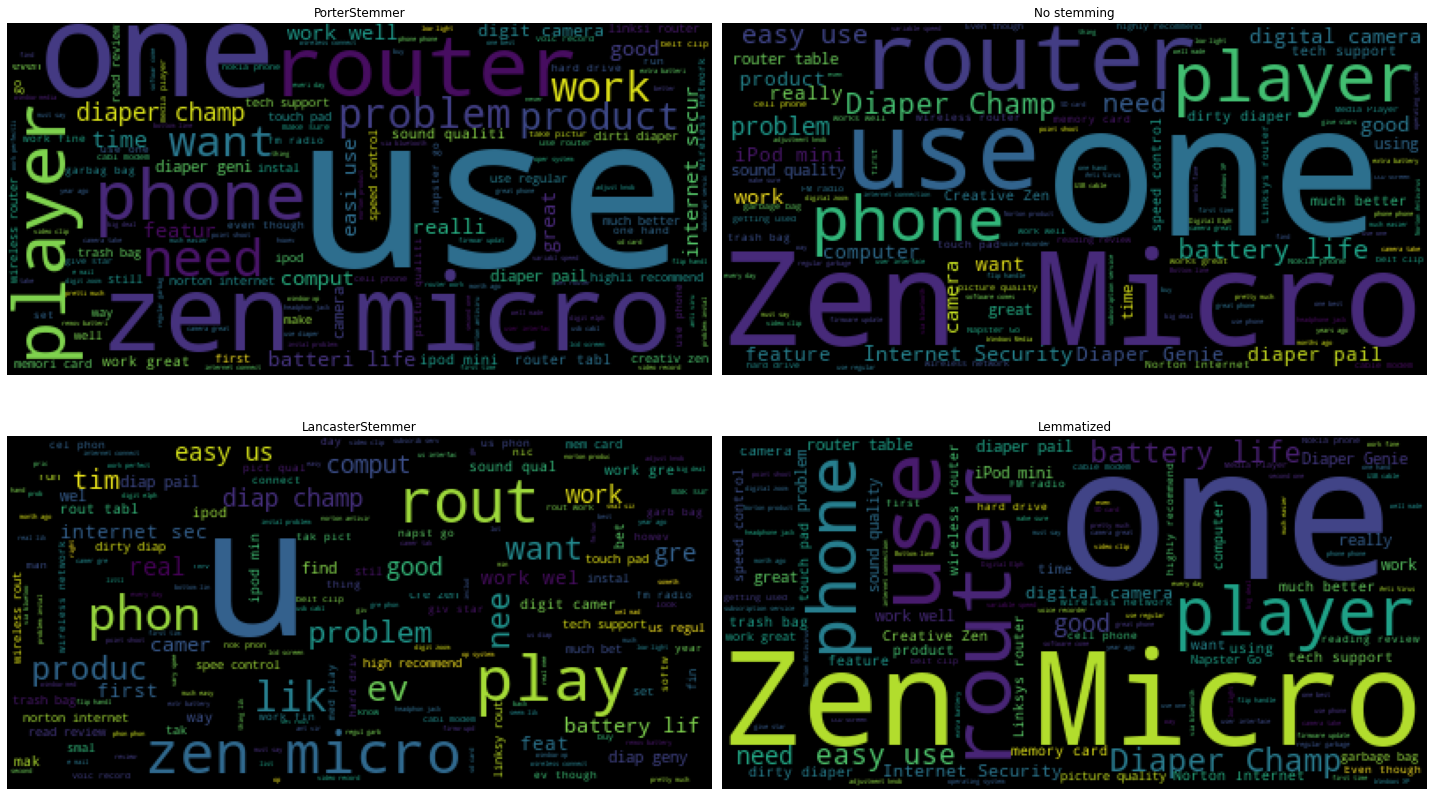

In [49]:
lem = nltk.WordNetLemmatizer()
inputs['Lemmatized'] = [ lem.lemmatize(w) for w in words ]
plt.rcParams['figure.figsize'] = [ 20, 12 ]
f, a = plt.subplots(2, 2)
i, j = 0, 0
for key in inputs:
  a[i, j].imshow(WordCloud(relative_scaling = 1).generate(' '.join(inputs[key])))
  a[i, j].axis('off')
  a[i, j].set_title(key)
  i += 1
  if i == 2:
    i = 0
    j += 1
plt.tight_layout(pad = 1)
plt.show()

So, now, how much difference does it make in NLP applications? When should we stem? How should we stem? In which scenarios would lemmatization work better? This week's reflection will revisit our former results in this light.